In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set = dataset_train.iloc[ : , 1:2].values

In [6]:
training_set.shape

(1258, 1)

In [7]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
X_train = []
y_train = []

for i in range (60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60 : i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(1198, 60)

In [13]:
y_train.shape

(1198,)

In [14]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

In [15]:
X_train.shape

(1198, 60, 1)

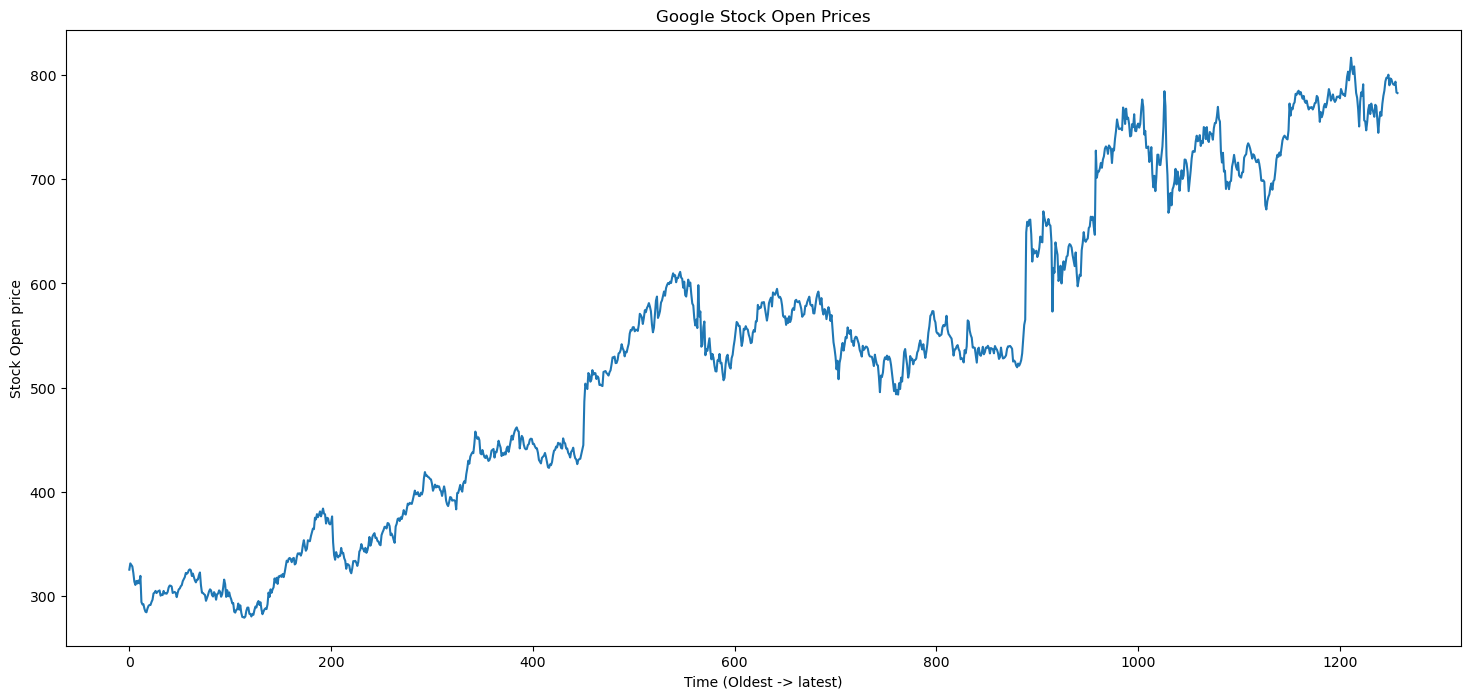

In [17]:
plt.figure(figsize = (18,8))
plt.plot(dataset_train['Open'])
plt.title('Google Stock Open Prices')
plt.xlabel("Time (Oldest -> latest)")
plt.ylabel('Stock Open price')
plt.show()

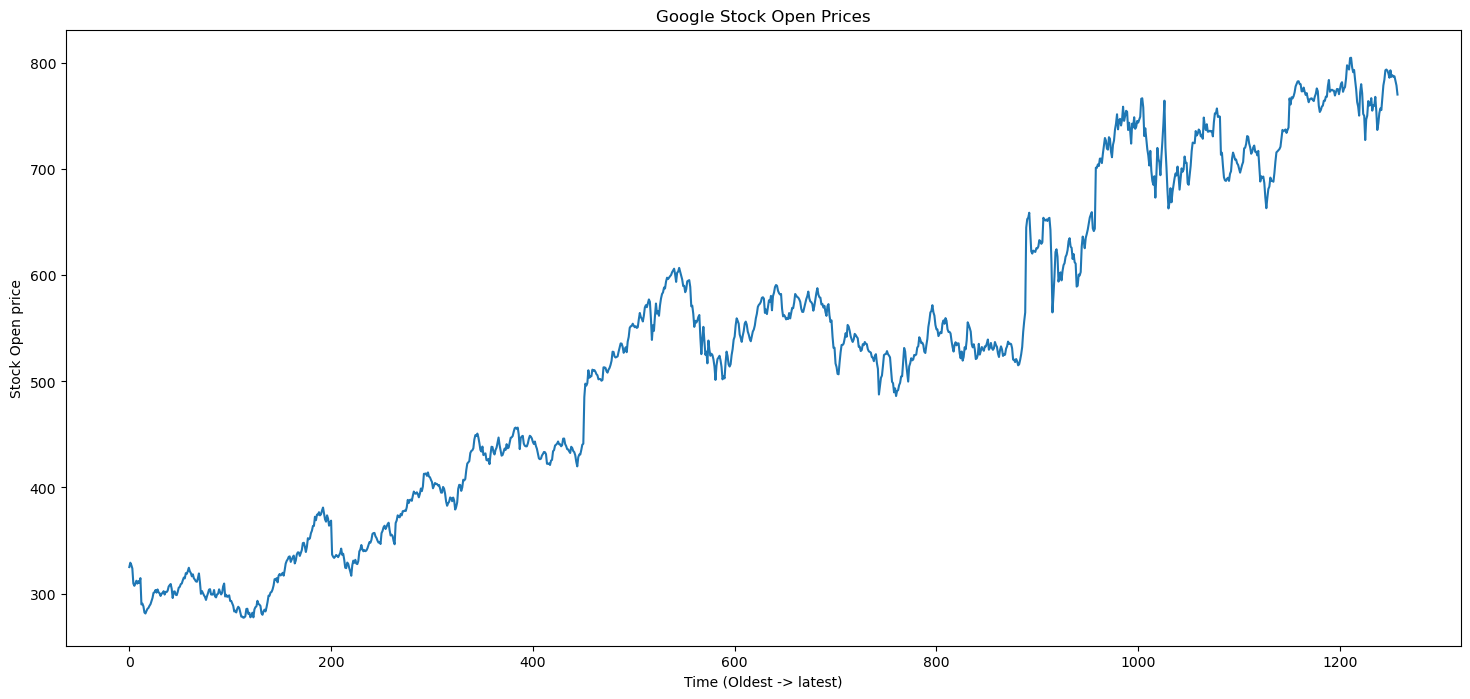

In [18]:
plt.figure(figsize = (18,8))
plt.plot(dataset_train['Low'])
plt.title('Google Stock Open Prices')
plt.xlabel("Time (Oldest -> latest)")
plt.ylabel('Stock Open price')
plt.show()

In [21]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate=0.2))\

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate=0.2))

regressor.add(Dense(units = 1))

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
regressor.fit(x = X_train,
              y = y_train, 
              batch_size = 32,
              epochs = 100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 168ms/step - loss: 0.1868
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0952
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - loss: 0.0872
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0798
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 0.0776
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0793
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 0.0784
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 0.0774
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - loss: 0.0759
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - loss: 0.0785
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - loss: 0.0785
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 0.0769
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 0.0779
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 0.0766
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7

In [24]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")

In [25]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [27]:
real_stock_price = dataset_test.iloc[ : , 1:2].values
real_stock_price.shape

(20, 1)

In [29]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [32]:
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

In [33]:
len(inputs)

80

In [34]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [35]:
X_test.shape

(20, 60, 1)

In [36]:
predicted_stock_prize = regressor.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [37]:
predicted_stock_prize = sc.inverse_transform(predicted_stock_prize)

ValueError: Found array with dim 3. None expected <= 2.

ValueError: x and y can be no greater than 2D, but have shapes (20,) and (20, 60, 1)

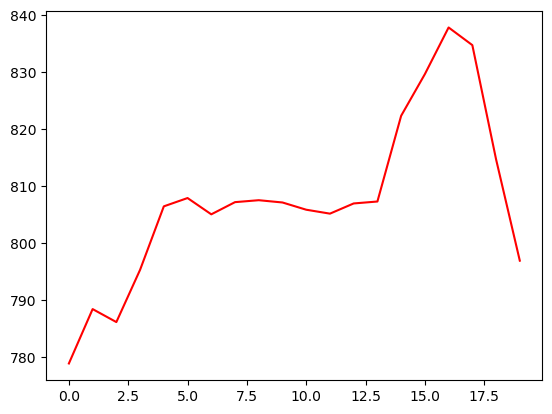

In [38]:
plt.plot(real_stock_price, color = 'red', label = 'real price')
plt.plot(predicted_stock_prize, color = 'blue', label = 'Predicted price')
plt.title('Google Stock Price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()